<a href="https://colab.research.google.com/github/tomiambro/af-cnn-fastai/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [2]:
from fastai.vision.all import *
from torchvision import transforms as T

import gc

In [11]:
dataset_path = '/content/drive/MyDrive/Datasets/training/cpsc_2018/g1/images'  #change dir to your project folder
folder_path = '/content/drive/MyDrive/Datasets/training/cpsc_2018/'

In [12]:
path = Path(f"{dataset_path}")

In [13]:
def label_func(fname):
    return "Non-AF" if fname.name[0].isupper() else "AF"

In [14]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock(['Non-AF', 'AF'], sort=False)),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=label_func,
    # item_tfms=Resize(350,350),
    batch_tfms=Normalize.from_stats(*imagenet_stats))

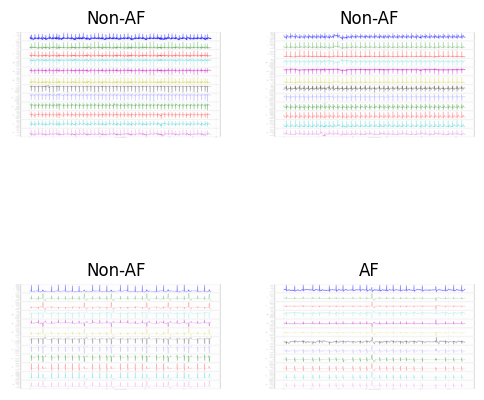

In [15]:
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4)